WHEN RUNNING THIS, UPLOAD THE FOLLOWING FILES IN SAME DIRECTORY: [Newman1.png, Newman2.png, Newman3.png] These can be found in the static folder

In [115]:
!pip install opencv-python==4.5.3.*
!pip install opencv-contrib-python==4.5.3.*

In [116]:
import cv2 as cv
# Import library modules
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
# PIL is the Python Imaging Library
from PIL import Image  
# The following is a substitute for cv2.imshow, which Colab does not allow
from google.colab.patches import cv2_imshow
from random import randrange

(102, 128)


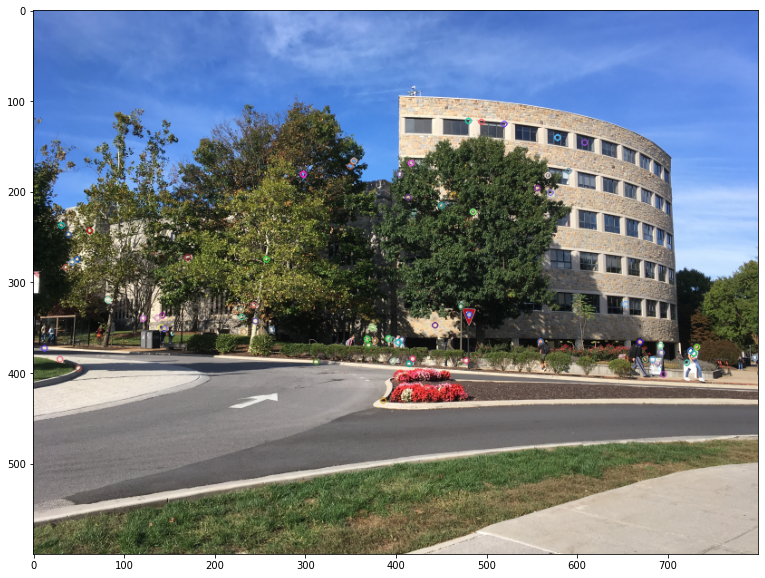

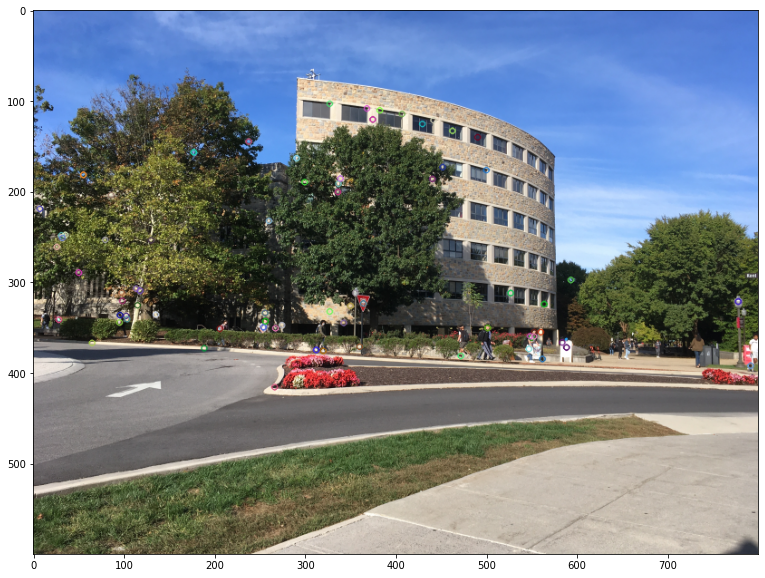

In [117]:
def load_image(filename):
  img = np.asarray(Image.open(filename))
  #img = img.astype("float32")/255.0
  return img

# img = load_image('Newman1.png')
# fig = plt.figure()
# fig.set_size_inches(18, 10) # You can adjust the size of the displayed figure
# plt.imshow(img)
# img = img*255
img = cv.imread('Newman1.png')
img2 = cv.imread('Newman2.png')
gray= cv.cvtColor(img,cv.COLOR_RGB2BGR)
gray2= cv.cvtColor(img2,cv.COLOR_RGB2BGR)
sift = cv.xfeatures2d.SIFT_create(nfeatures=100)
#print(img)
#img = cv.imread('Newman1.png')
#print(img2.shape,img.shape)
kp, des = sift.detectAndCompute(gray,None)
kp2, des2 = sift.detectAndCompute(gray2,None)
kp_list = []
kp_list2 = []
print(des.shape)
for i in kp:
  kp_list.append(i.pt)
for i in kp2:
  kp_list2.append(i.pt)
img=cv.drawKeypoints(gray,kp,img)
img2=cv.drawKeypoints(gray2,kp2,img2)

fig = plt.figure()
fig.set_size_inches(18, 10) # You can adjust the size of the displayed figure
plt.imshow(img)

# img_orig = load_image('Newman1.png')
fig = plt.figure()
fig.set_size_inches(18, 10) # You can adjust the size of the displayed figure
plt.imshow(img2)

distance time 1.296286286000253
overall time 1.311562500000008


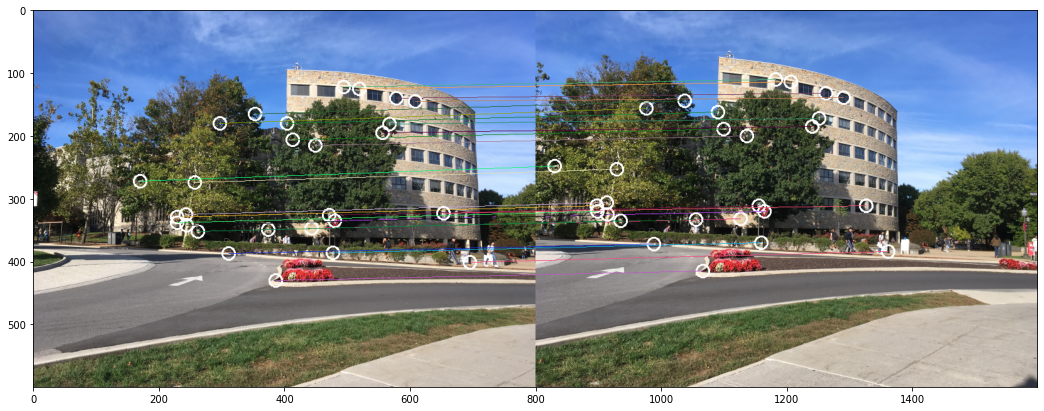

In [118]:
import time
def nn_match(kp_src, kp_dst, desc_src, desc_dst, t, d_func):
  '''Locates matching descriptors between two sets of points.
  Input:
    kp_src: source keypoints, shape (N, 2)
    kp_dst: destination keypoints, shape (N, 2)
    desc_src: source descriptors, shape (N, 128)
    desc_dst: destination descriptors, shape (N, 128)
    t: threshold to compare NNDR to
    d_func: distance function to be used, L1 or L2
  Output:
    matches: list of matching descriptors, shape (M, 3)
  '''
  start = time.process_time()
  dists = []
  nndrs = []
  total_time = 0
  # print(len(kp_src))
  for i in range(len(kp_src)):
    i_dists = []
    for j in range(len(kp_dst)):
      # print(desc_src[i].shape)
      start1 = time.process_time()
      if d_func == "l1":
        # i_dists.append([i, j, abs(kp_src[i][0]-kp_dst[j][0]) + abs(kp_src[i][1]-kp_dst[j][1]), kp_src[i], kp_dst[j]])
        sum = 0
        for m in range(len(desc_src)):
          sum += abs((desc_src[i][m]-desc_dst[j][m]))
        i_dists.append([i, j, sum, kp_src[i], kp_dst[j]])
      else:
        # i_dists.append([i, j, np.sqrt((kp_src[i][0]-kp_dst[j][0])**2 + (kp_src[i][1]-kp_dst[j][1])**2), kp_src[i], kp_dst[j]])
        sum = 0
        # print(desc_src[0])
        # print(desc_src)
        for m in range(len(desc_src)):
          sum += (desc_src[i][m]+desc_dst[j][m])**2
        # print(sum)
        i_dists.append([i, j, np.sqrt(sum), kp_src[i], kp_dst[j]])
        # print([i, j, np.sqrt(sum), kp_src[i], kp_dst[j]])
      total_time += time.process_time() - start1
    
    #sort i_dists based on value of i_dists[0]
    i_dists.sort(key=lambda x:x[2])
    # print(i_dists)
    i_dists = i_dists[:2]
    d1 = i_dists[0][2]
    d2 = i_dists[1][2]
    nndr = d1/d2
    nndrs.append(nndr)
    # print(nndrs)
    if (nndr < t):
      dists.append(i_dists[0])
    # dists.append(i_dists[0])
  # print(dists)
  # print(len(dists))
  print("distance time",total_time)
  print("overall time",time.process_time() - start)
  return dists

l = nn_match(kp_list,kp_list2,des,des2,0.7,"l1")
# print(l)
matches1 = []
matches2 = []
for i in l:
  # print(len(i))
  # print(i)
  matches1.append(i[3])
  matches2.append(i[4])
# print(matches)
img2 = cv.imread('Newman1.png')
img3 = cv.imread('Newman2.png')
img2 = cv.cvtColor(img2,cv.COLOR_RGB2BGR)
img3 = cv.cvtColor(img3,cv.COLOR_RGB2BGR)
img_concat = np.concatenate([img2,img3], axis=1)
for i in range(len(matches1)):
  cv2.circle(img_concat, (int(matches1[i][0]), int(matches1[i][1])), 10, (255, 255, 255), 2)
  cv2.circle(img_concat, (800+int(matches2[i][0]), int(matches2[i][1])), 10, (255, 255, 255), 2)
  cv2.line(img_concat, (int(matches1[i][0]), int(matches1[i][1])), (800+int(matches2[i][0]), int(matches2[i][1])), (randrange(255), randrange(255), randrange(255)), 1)
# cv2.imshow("Canvas", img2)
cv.cvtColor(img_concat,cv.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(18, 10)
plt.imshow(img_concat)

distance time 4.524636861000971
overall time 4.542996054000014


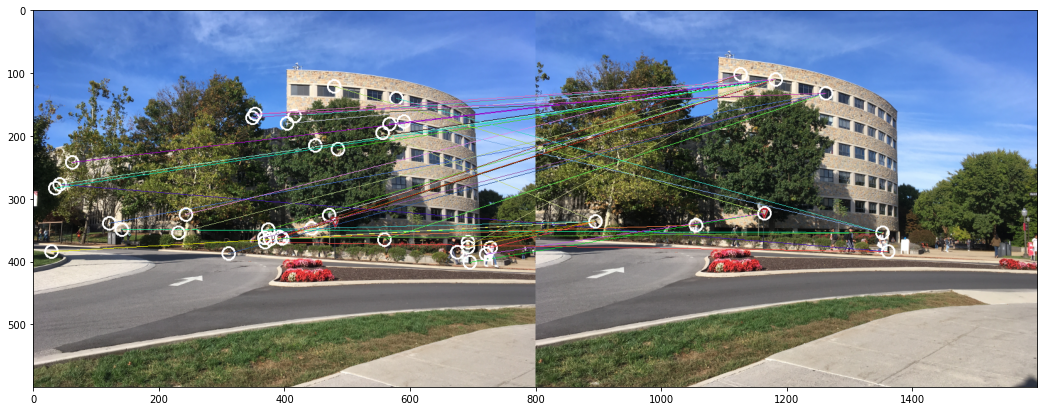

In [119]:
l2_calc = nn_match(kp_list,kp_list2,des,des2,0.99,"l2")
# print(l)
matches1 = []
matches2 = []
for i in l2_calc:
  # print(len(i))
  # print(i)
  matches1.append(i[3])
  matches2.append(i[4])
# print(matches)
img2 = cv.imread('Newman1.png')
img3 = cv.imread('Newman2.png')
img2 = cv.cvtColor(img2,cv.COLOR_RGB2BGR)
img3 = cv.cvtColor(img3,cv.COLOR_RGB2BGR)
img_concat = np.concatenate([img2,img3], axis=1)
for i in range(len(matches1)):
  cv2.circle(img_concat, (int(matches1[i][0]), int(matches1[i][1])), 10, (255, 255, 255), 2)
  cv2.circle(img_concat, (800+int(matches2[i][0]), int(matches2[i][1])), 10, (255, 255, 255), 2)
  cv2.line(img_concat, (int(matches1[i][0]), int(matches1[i][1])), (800+int(matches2[i][0]), int(matches2[i][1])), (randrange(255), randrange(255), randrange(255)), 1)
# cv2.imshow("Canvas", img2)
cv.cvtColor(img_concat,cv.COLOR_BGR2RGB)
fig = plt.figure()
fig.set_size_inches(18, 10)
plt.imshow(img_concat)

In [120]:
time_test = nn_match(kp_list,kp_list2,des,des2,0.25,"l1")
time_test = nn_match(kp_list,kp_list2,des,des2,0.50,"l1")
time_test = nn_match(kp_list,kp_list2,des,des2,0.75,"l1")
time_test = nn_match(kp_list,kp_list2,des,des2,0.99,"l1")

time_test = nn_match(kp_list,kp_list2,des,des2,0.25,"l2")
time_test = nn_match(kp_list,kp_list2,des,des2,0.50,"l2")
time_test = nn_match(kp_list,kp_list2,des,des2,0.75,"l2")
time_test = nn_match(kp_list,kp_list2,des,des2,0.99,"l2")

distance time 1.3550545090011497
overall time 1.3711006300000008
distance time 1.300283727998135
overall time 1.3155195610000305
distance time 1.301455103998876
overall time 1.3169279260000053
distance time 1.2982740170036209
overall time 1.312535309999987
distance time 4.494164581998689
overall time 4.512968096999998
distance time 4.461640744002523
overall time 4.480501533999984
distance time 4.450945395001213
overall time 4.471226006999984
distance time 4.456193764001
overall time 4.474981065999998
